In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [129]:
#loading the dataset

df1 = pd.read_csv('train.csv').drop(columns=['Artist Name', 'Track Name'])
df2 = pd.read_csv('test.csv').drop(columns=['Artist Name', 'Track Name'])

df = pd.concat([df1,df2])

target = df['Class']
df.drop(columns=['Class'], inplace = True)

keys = df.keys()
numcols = len(keys)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.00000,4
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.00000,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.00000,4
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.00000,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.00000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.264000,NaN,0.0735,0.6430,128.019,231680.00000,4
7709,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.025400,0.009330,0.3620,0.2570,127.446,367879.00000,4
7710,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.159000,0.000011,0.0590,0.6910,135.224,2.45355,4
7711,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.080600,0.152000,0.0558,0.9670,133.255,221320.00000,4


In [130]:
#check for missing values
for k in keys:
    print(f'column {k} has {np.round(df[k].isna().sum()/len(df)*100, 2)}% missing values')


column Popularity has 2.55% missing values
column danceability has 0.0% missing values
column energy has 0.0% missing values
column key has 10.98% missing values
column loudness has 0.0% missing values
column mode has 0.0% missing values
column speechiness has 0.0% missing values
column acousticness has 0.0% missing values
column instrumentalness has 24.45% missing values
column liveness has 0.0% missing values
column valence has 0.0% missing values
column tempo has 0.0% missing values
column duration_in min/ms has 0.0% missing values
column time_signature has 0.0% missing values


In [131]:
#Populatirity has 2.55% missing values -> can be filled
#key and instrumentalness have very high missing value rates -> mvs should be removed as to not alter the 
#distribution

df = df[df['instrumentalness'].notna()]

#Fill Popularity mv with median, because all popularities seem to be integer
df.fillna(np.mean(df['Popularity']), inplace = True)
df

/tmp/ipykernel_8884/2094849782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(np.mean(df['Popularity']), inplace = True)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.00000,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.00000,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.00000,4
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.00000,4
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.00000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,22.0,0.301,0.795,8.0,-3.212,1,0.0313,0.001400,0.838000,0.0821,0.4840,94.257,130046.00000,4
7707,48.0,0.732,0.657,1.0,-4.628,0,0.0505,0.003960,0.000720,0.1210,0.9030,122.039,175154.00000,4
7709,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.025400,0.009330,0.3620,0.2570,127.446,367879.00000,4
7710,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.159000,0.000011,0.0590,0.6910,135.224,2.45355,4


In [132]:
#Univariate Analysis
means = {}
medians = {}
stdevs = {}
for k in keys:
    mean = np.mean(df[df[k].notna()][k])
    med = np.median(df[df[k].notna()][k])
    std = np.sqrt(np.mean((df[k]-mean)**2))
    means[k] = mean
    medians[k] = med
    stdevs[k] = std

means,medians,stdevs

({'Popularity': 43.223218524183764,
  'danceability': 0.526893801163569,
  'energy': 0.6651921531431807,
  'key': 10.067715656937903,
  'loudness': -8.251337023116923,
  'mode': 0.6446995829686454,
  'speechiness': 0.07020328476548421,
  'acousticness': 0.24291120916645217,
  'instrumentalness': 0.1753177249276631,
  'liveness': 0.19579611285589252,
  'valence': 0.4732002883179735,
  'tempo': 122.96216259074292,
  'duration_in min/ms': 210201.9582050207,
  'time_signature': 3.91036400144159},
 {'Popularity': 43.0,
  'danceability': 0.529,
  'energy': 0.71,
  'key': 7.0,
  'loudness': -7.296,
  'mode': 1.0,
  'speechiness': 0.0457,
  'acousticness': 0.0597,
  'instrumentalness': 0.00395,
  'liveness': 0.128,
  'valence': 0.465,
  'tempo': 120.177,
  'duration_in min/ms': 216504.0,
  'time_signature': 4.0},
 {'Popularity': 16.413981824063423,
  'danceability': 0.16588667643736088,
  'energy': 0.24444562263916936,
  'key': 12.04120631613534,
  'loudness': 4.284293488987538,
  'mode': 0.47

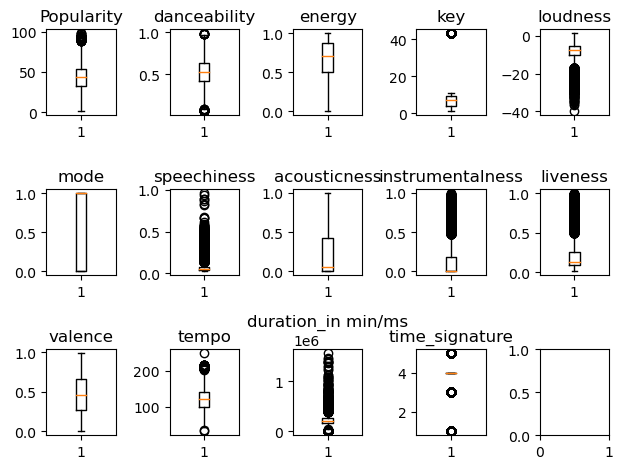

In [133]:
#Visualise each distribution using a boxplot
n = 3
m = 5
fig, axs = plt.subplots(n,m)


for i in range(n):
    for j in range(m):
        idx = i*m+j 
        if (idx < numcols):
            axs[i][j].boxplot(df[keys[idx]])
            axs[i][j].title.set_text(keys[idx])
            
plt.tight_layout()

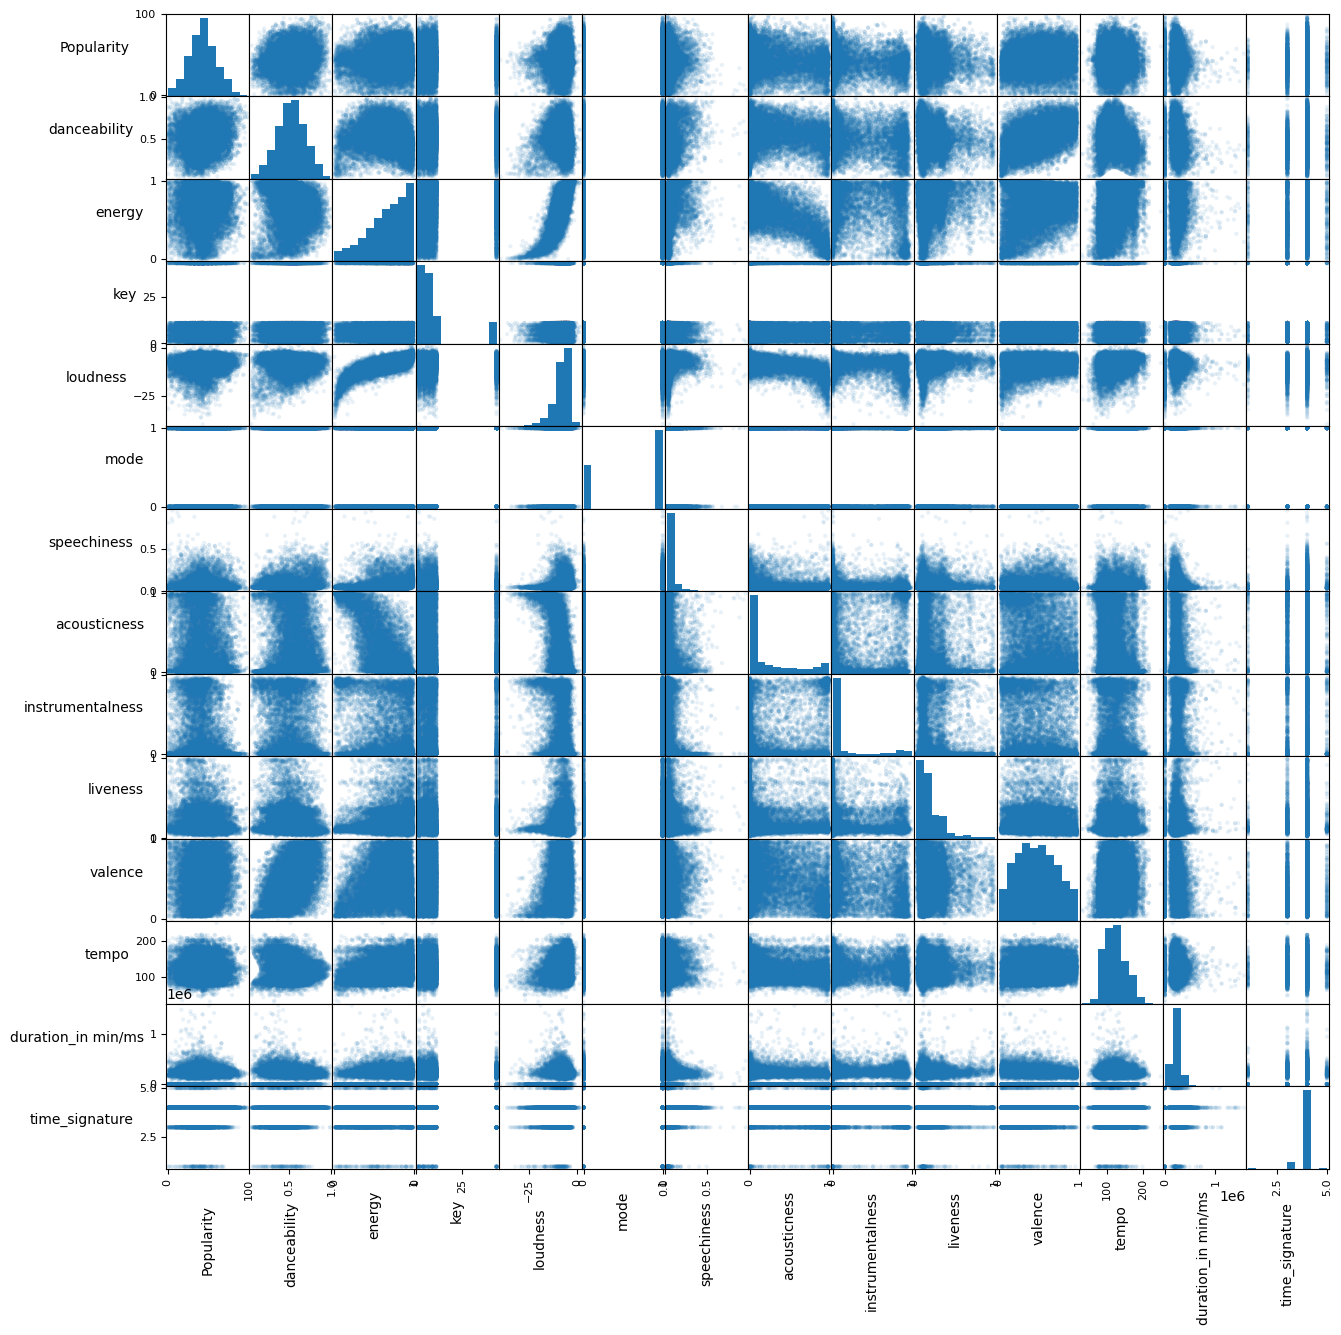

In [134]:
#Bivariate Analysis
#Visualize each pair of variables

axes = pd.plotting.scatter_matrix(df, alpha = 0.1, figsize = (15,15));
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

In [135]:
#Normalisation
#No strong non linear dependence can be seen in above plots.
#as such a simple min max scaler to the [0,1] intervall is used
maxs = np.max(df, axis = 0)
mins = np.min(df, axis = 0)


for k in keys:
    df[k] = (df[k]-mins[k])/(maxs[k]-mins[k])

#repeat means and stdev calculation
means = {}
medians = {}
stdevs = {}
for k in keys:
    mean = np.mean(df[df[k].notna()][k])
    med = np.median(df[df[k].notna()][k])
    std = np.sqrt(np.mean((df[k]-mean)**2))
    means[k] = mean
    medians[k] = med
    stdevs[k] = std

    
df

/tmp/ipykernel_8884/2728719131.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = (df[k]-mins[k])/(maxs[k]-mins[k])


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,0.546392,0.346890,0.813996,0.047367,0.792166,1.0,0.019307,0.001104,4.025104e-03,0.090173,0.578252,0.392437,0.161250,0.75
2,0.350515,0.402841,0.613992,0.118418,0.765439,1.0,0.032000,0.487952,1.957833e-04,0.386702,0.799797,0.535104,0.070248,0.75
4,0.536082,0.115558,0.974999,0.023684,0.863607,1.0,0.206400,0.000170,1.616367e-02,0.162028,0.093293,0.769838,0.147303,0.75
5,0.536082,0.188724,0.977000,0.118418,0.988452,1.0,0.090133,0.003544,6.063259e-03,0.162028,0.244919,0.559185,0.133321,0.75
6,0.484536,0.661072,0.657993,0.094735,0.733653,0.0,0.086933,0.405622,3.413658e-07,0.087238,0.688008,0.515052,0.210992,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,0.216495,0.259737,0.794996,0.165786,0.889438,1.0,0.009387,0.001406,8.413653e-01,0.071045,0.491870,0.291026,0.083302,0.75
7707,0.484536,0.723478,0.656993,0.000000,0.855158,0.0,0.029867,0.003976,7.218883e-04,0.110414,0.917683,0.417953,0.112196,0.75
7709,0.453608,0.397461,0.598992,0.142102,0.792021,0.0,0.014720,0.025502,9.366475e-03,0.354316,0.261179,0.442656,0.235648,0.75
7710,0.381443,0.802023,0.904998,0.118418,0.792360,0.0,0.269333,0.159639,9.638564e-06,0.047667,0.702236,0.478191,0.000001,0.75


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Popularity,1.000000,0.135427,0.059174,-0.000382,0.101772,0.012171,-0.013957,-0.123116,-0.163609,-0.075329,0.065056,-0.008382,-0.004182,0.062547
danceability,0.135427,1.000000,-0.088802,0.007022,0.048176,-0.046511,0.092883,0.014496,-0.193964,-0.117621,0.459975,-0.178804,-0.113744,0.131151
energy,0.059174,-0.088802,1.000000,-0.036378,0.795712,-0.036590,0.181648,-0.761582,-0.174098,0.201563,0.220803,0.227569,0.269858,0.161573
key,-0.000382,0.007022,-0.036378,1.000000,-0.022705,0.076432,-0.045983,0.023103,-0.006308,0.012296,0.026173,-0.000097,-0.011070,-0.013797
loudness,0.101772,0.048176,0.795712,-0.022705,1.000000,-0.028510,0.126121,-0.649412,-0.339508,0.123413,0.191496,0.187727,0.217848,0.135323
mode,0.012171,-0.046511,-0.036590,0.076432,-0.028510,1.000000,-0.048376,0.027704,-0.025614,-0.005706,0.004736,0.017898,-0.058460,-0.013345
speechiness,-0.013957,0.092883,0.181648,-0.045983,0.126121,-0.048376,1.000000,-0.100565,-0.066538,0.092034,0.000814,0.100239,0.014153,0.037501
acousticness,-0.123116,0.014496,-0.761582,0.023103,-0.649412,0.027704,-0.100565,1.000000,0.173364,-0.116476,-0.138376,-0.192072,-0.357047,-0.153200
instrumentalness,-0.163609,-0.193964,-0.174098,-0.006308,-0.339508,-0.025614,-0.066538,0.173364,1.000000,-0.044513,-0.224677,-0.035588,0.002722,-0.058800
liveness,-0.075329,-0.117621,0.201563,0.012296,0.123413,-0.005706,0.092034,-0.116476,-0.044513,1.000000,0.019901,0.029981,0.060404,0.021360


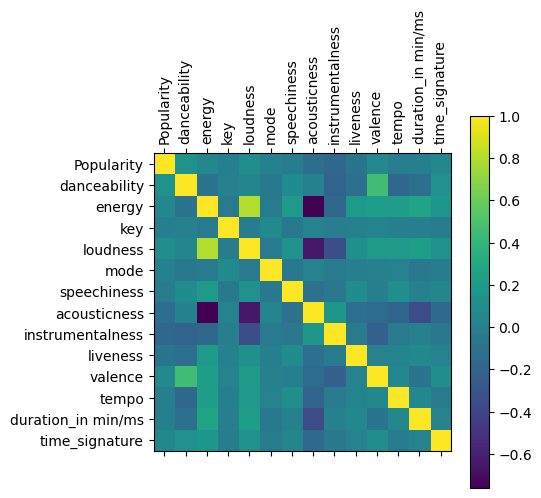

In [136]:
#Calculate and visualize Correlation between each pair of variables

correlations = df.corr()

plt.matshow(correlations)
plt.colorbar()
plt.xticks(range(numcols), keys, rotation = 90);
plt.yticks(range(numcols), keys, rotation = 0);
correlations

In [137]:
#Only one highly correlated variable pair obvious, which is "energy" and "loudness", a correlation that could have
#been expected.
#Witch a correlation of .795 this variable can be removed while barely losing any information.

df.drop(columns=['loudness'], inplace = True)
keys = df.keys()
df

/tmp/ipykernel_8884/2002764313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['loudness'], inplace = True)


,Popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,0.546392,0.346890,0.813996,0.047367,1.0,0.019307,0.001104,4.025104e-03,0.090173,0.578252,0.392437,0.161250,0.75
2,0.350515,0.402841,0.613992,0.118418,1.0,0.032000,0.487952,1.957833e-04,0.386702,0.799797,0.535104,0.070248,0.75
4,0.536082,0.115558,0.974999,0.023684,1.0,0.206400,0.000170,1.616367e-02,0.162028,0.093293,0.769838,0.147303,0.75
5,0.536082,0.188724,0.977000,0.118418,1.0,0.090133,0.003544,6.063259e-03,0.162028,0.244919,0.559185,0.133321,0.75
6,0.484536,0.661072,0.657993,0.094735,0.0,0.086933,0.405622,3.413658e-07,0.087238,0.688008,0.515052,0.210992,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,0.216495,0.259737,0.794996,0.165786,1.0,0.009387,0.001406,8.413653e-01,0.071045,0.491870,0.291026,0.083302,0.75
7707,0.484536,0.723478,0.656993,0.000000,0.0,0.029867,0.003976,7.218883e-04,0.110414,0.917683,0.417953,0.112196,0.75
7709,0.453608,0.397461,0.598992,0.142102,0.0,0.014720,0.025502,9.366475e-03,0.354316,0.261179,0.442656,0.235648,0.75
7710,0.381443,0.802023,0.904998,0.118418,0.0,0.269333,0.159639,9.638564e-06,0.047667,0.702236,0.478191,0.000001,0.75
